## Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import Data
import math

## Data Handling

In [85]:
df = pd.read_csv('Data Set for Assignment 1.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Sigmoid Function

In [86]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

## Stochastic Gradient Descent

In [87]:
def stochastic(train,learning):
    tclass = train['diagnosis'].tolist()
    train = train.drop(columns = ['id', 'diagnosis'])
    xbias = []
    for i in range(len(train)):
        xbias.append(1)

    train.insert(loc = 0, column = 'bias', value = xbias, allow_duplicates = False) #Adding a bias column at position 0 to our training data

    sample = []

    omega = list(np.ones(31)) #setting the initial value of omega vector to all zeroes

    for i in range(1):
        if(omega[i] == 1):
            omega[i] = 0
            
    for i in range(len(tclass)): #We assign B to 0 and M to 1
        if(tclass[i] == 'B'):
            sample.append(0)
        else:
            sample.append(1)
            
    error = []

    gradient = []

    i = 0
    for i in range(10):
        while i < len(train):
            x = list(train.iloc[i])
            error.append(-1 * sample[i] * np.log(sigmoid(np.dot(omega,x))) - ((1 - sample[i]) * np.log(1 - sigmoid(np.dot(omega,x)))))
            gradient = [ j * (sigmoid(np.dot(omega,x)) - sample[i]) for j in x]
            gradient = [k * learning for k in gradient]
            omega = list(np.subtract(omega,gradient))
            i = i + 1
                   
    return omega,error

## Batch Gradient Descent

In [88]:
def batch(train,learning):
    tclass = train['diagnosis'].tolist()
    train = train.drop(columns = ['id', 'diagnosis'])
    xbias = []
    for i in range(len(train)):
        xbias.append(1)

    train.insert(loc = 0, column = 'bias', value = xbias, allow_duplicates = False) #Adding a bias column at position 0 to our training data

    sample = []

    omega = list(np.ones(31)) #setting the initial value of omega vector to all zeroes

    for i in range(1):
        if(omega[i] == 1):
            omega[i] = 0
            
    for i in range(len(tclass)): #We assign B to 0 and M to 1
        if(tclass[i] == 'B'):
            sample.append(0)
        else:
            sample.append(1)
    
    error1 = []

    gradient1 = []


    k = 0
    for u in range(2):
        j = 0
        while j < len(train):
            sum = 0
            gsum = list(np.zeros(31))
            for k in range(len(train)):
                y = list(train.iloc[k])
                g = (-1 * sample[k] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                if(math.isnan(g) == True):
                    sum = sum
                else:
                    sum = sum + g
                grad = [l * (sigmoid(np.dot(omega,y)) - sample[k]) for l in y]
                gsum = list(np.add(gsum,grad))
                k = k + 1
            error1.append(sum)
            gradient1 = [m * learning for m in gsum]
            omega = list(np.subtract(omega,gradient1))
            j = j + 1

    return omega,error1
        

## Mini Batch Gradient Descent

In [89]:
def mini_batch(train,learning):

    tclass = train['diagnosis'].tolist()
    train = train.drop(columns = ['id', 'diagnosis'])
    xbias = []
    for i in range(len(train)):
        xbias.append(1)

    train.insert(loc = 0, column = 'bias', value = xbias, allow_duplicates = False) #Adding a bias column at position 0 to our training data

    sample = []

    omega = list(np.ones(31)) #setting the initial value of omega vector to all zeroes

    for i in range(1):
        if(omega[i] == 1):
            omega[i] = 0
            
    for i in range(len(tclass)): #We assign B to 0 and M to 1
        if(tclass[i] == 'B'):
            sample.append(0)
        else:
            sample.append(1)

    error1 = []

    gradient1  = []


    k = 0
    for p in range(10):
        j = 0
        while j < 6:
            sum = 0
            gsum = list(np.zeros(31))
            if(j == 0):
                for k in range(63):
                    y = list(train.iloc[k])
                    g = (-1 * sample[k] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1
            if(j == 1):
                for k in range(63):
                    y = list(train.iloc[k+64])
                    g = (-1 * sample[k+64] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+64]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+64]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1

            if(j == 2):
                for k in range(63):
                    y = list(train.iloc[k+128])
                    g = (-1 * sample[k+128] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+128]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+128]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1

            if(j == 3):
                for k in range(63):
                    y = list(train.iloc[k+192])
                    g = (-1 * sample[k+192] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+192]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+192]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1
            
            if(j == 4):
                for k in range(63):
                    y = list(train.iloc[k+256])
                    g = (-1 * sample[k+256] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+256]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+256]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1

            if(j == 5):
                for k in range(len(train) - 320):
                    y = list(train.iloc[k+320])
                    g = (-1 * sample[k+320] * np.log(sigmoid(np.dot(omega,y))) - ((1 - sample[k+320]) * np.log(1 - sigmoid(np.dot(omega,y)))))
                    if(math.isnan(g) == True):
                        sum = sum
                    else:
                        sum = sum + g
                    grad = [l * (sigmoid(np.dot(omega,y)) - sample[k+320]) for l in y]
                    gsum = list(np.add(gsum,grad))
                    k = k + 1

            error1.append(sum)
            gradient1 = [m * learning for m in gsum]
            omega = list(np.subtract(omega,gradient1))
            j = j + 1

    return omega,error1
        



## Testing The Model

In [90]:
def logistic_accuracy(omega,test,threshold):

    ybias = []
    for i in range(len(test)):
        ybias.append(1)

    test.insert(loc = 0, column = 'bias', value = ybias, allow_duplicates = False)

    teclass = test['diagnosis'].tolist()
    test = test.drop(columns = ['id', 'diagnosis'])
    prediction = []
    for i in range(len(test)):
        big = np.float128(np.dot(omega,test.iloc[i]))
        """
        if(big > 1000):
            prediction.append('B')
        elif(big < -1000):
            prediction.append('M')
            """
        if(sigmoid(big) > threshold):
            prediction.append('M')
        else:
            prediction.append('B')

    accuracy = 0
    for i in range(len(teclass)):
        if(prediction[i] == teclass[i]):
            accuracy = accuracy + 1

    correct = accuracy / len(teclass)
    
    return correct

/var/folders/02/hhkpbp0n43l27g5_zyxytsxc0000gn/T/ipykernel_92302/3798257937.py:32: RuntimeWarning: divide by zero encountered in log
  error.append(-1 * sample[i] * np.log(sigmoid(np.dot(omega,x))) - ((1 - sample[i]) * np.log(1 - sigmoid(np.dot(omega,x)))))
/var/folders/02/hhkpbp0n43l27g5_zyxytsxc0000gn/T/ipykernel_92302/3798257937.py:32: RuntimeWarning: invalid value encountered in double_scalars
  error.append(-1 * sample[i] * np.log(sigmoid(np.dot(omega,x))) - ((1 - sample[i]) * np.log(1 - sigmoid(np.dot(omega,x)))))


[0.9680851063829787]


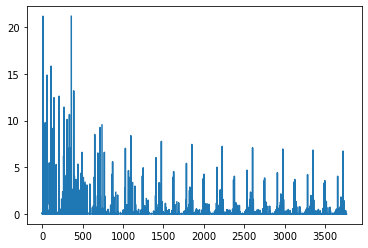

/var/folders/02/hhkpbp0n43l27g5_zyxytsxc0000gn/T/ipykernel_92302/3798257937.py:32: RuntimeWarning: divide by zero encountered in log
  error.append(-1 * sample[i] * np.log(sigmoid(np.dot(omega,x))) - ((1 - sample[i]) * np.log(1 - sigmoid(np.dot(omega,x)))))
/var/folders/02/hhkpbp0n43l27g5_zyxytsxc0000gn/T/ipykernel_92302/3798257937.py:32: RuntimeWarning: invalid value encountered in double_scalars
  error.append(-1 * sample[i] * np.log(sigmoid(np.dot(omega,x))) - ((1 - sample[i]) * np.log(1 - sigmoid(np.dot(omega,x)))))


[0.9680851063829787, 0.9840425531914894]


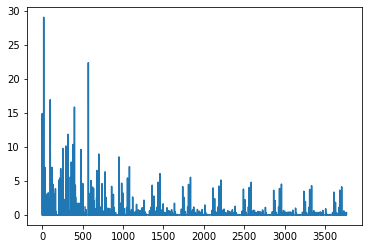

In [91]:
correct = []
for i in range(2):
    initial_data = Data.Feature1(df)
    d1 = Data.dshuffle(initial_data)
    train, test = Data.split(d1)
    train = Data.Feature2(train)
    test = Data.Feature2(test)
    omega,error = stochastic(train,0.01)
    corr = logistic_accuracy(omega,test,0.5)
    correct.append(corr)
    print(correct)
    plt.plot(error)
    plt.show()

In [92]:
print(np.mean(correct))

0.976063829787234
